<a href="https://colab.research.google.com/github/akmalrusdy/tubesSKO/blob/main/Akmal_Rusdy_Prasetyo_1101184015_TUBES_SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Akmal Rusdy Prasetyo

NIM : 1101184015

Kelas : TT-42-02

---
Skenario Perancangan FTTB :

Suatu gedung memiliki 13 lantai dan tinggi rata rata tiap lantai adalah 5 m. Jarak dari Gedung ke Sentral terdekat berkisar diantara 15 km. Pemasangan direncana menggunakan 6 konektor dan 2 splitter, splitter yang digunakan berjenis splitter 1:32 dengan redaman 16.5 dB. Kami menggunakan fiber jenis G657 dengan panjang gelombang 1490 nm dengan redaman 0.4 dB/Km. Maka dari itu dapat diperoleh 8 buah splicer yang memiliki redaman 0.1 db.

DIK :
*   Tinggi Gedung = 13*5 = 65m
*   Jumlah Konektor = 6
*   Jumlah Splitter = 2
*   Jumlah Splicer = 8
*   Fiber Jenis G657, panjang gelombang 1490nm, redaman 0.4 dB/Km
*   Redaman Splicer 0.1 dB











In [ ]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#SNR
R = 0.8 #Responsivitas (A/W)
SM = 3 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 200*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 300 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#PR
d = np.arange(0.065,15.065,1) #Jarak (km)
l_f = 0.4 #0.2 #Loss Fiber (dB/km)
n_s = 8 #Jumlah Splicer
l_s = 0.1 #Loss dari splicer (dB)
n_c = 6 #Jumlah Konektor
l_c = 0.3 #Loss dari konektor (dB)
l_sp = 16.5 + 16.5 #loss dari splitter (dB)
Pt = 3 #Daya tx (dBm)

In [ ]:
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  res_fiber = d * l_f
  res_splicer = n_s * l_s
  res_connector = n_c * l_c

  alfa_tot = res_fiber + res_splicer + res_connector + l_sp + SM
  Pr = Pt - alfa_tot
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-35.626 -36.026 -36.426 -36.826 -37.226 -37.626 -38.026 -38.426 -38.826
 -39.226 -39.626 -40.026 -40.426 -40.826 -41.226]


In [ ]:
def arus_primer():
  Pr_num = LtN(Pr)
  Ip = Pr_num * R
  return Ip
Ip = arus_primer()
print("Ip = ", Ip)

Ip =  [2.19023133e-04 1.99751471e-04 1.82175507e-04 1.66146037e-04
 1.51526987e-04 1.38194254e-04 1.26034658e-04 1.14944974e-04
 1.04831062e-04 9.56070652e-05 8.71946798e-05 7.95224931e-05
 7.25253757e-05 6.61439287e-05 6.03239800e-05]


In [ ]:
def signal_power():
  SP = (Ip*M)**2
  return SP
SP = signal_power()
print('Signal Power = ', SP)

Signal Power =  [2.53767292e-09 2.11074440e-09 1.75564072e-09 1.46027835e-09
 1.21460663e-09 1.01026579e-09 8.40302481e-10 6.98933161e-10
 5.81347282e-10 4.83543607e-10 4.02194054e-10 3.34530443e-10
 2.78250303e-10 2.31438521e-10 1.92502177e-10]


In [ ]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*Ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = SP # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[29.76416235 28.9683948  28.17225843 27.37578511 26.57900397 25.7819417
 24.98462266 24.18706918 23.38930163 22.59133865 21.79319727 20.99489305
 20.19644019 19.39785168 18.59913937]


In [ ]:
#RUMUS Q
def Q_rumus():
  Q = 0.5*(10**(SNR/20))
  return Q
Q = Q_rumus()
print(Q)

[15.3878563  14.04073181 12.81099689 11.68851288 10.66400164  9.72897504
  8.87566981  8.0969874   7.3864385   6.73809201  6.14652805  5.60679473
  5.11436847  4.66511752  4.25526854]


In [ ]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.47507837e-50 5.46519624e-42 7.38093270e-35 6.30817314e-29
 5.40534920e-24 6.81598978e-20 1.74169104e-16 1.17754804e-13
 2.63078799e-11 2.33740003e-09 9.63693508e-08 2.09667911e-06
 2.67924629e-05 2.19840306e-04 1.24756855e-03]


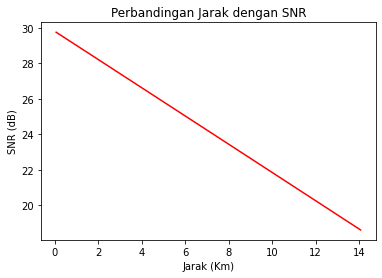

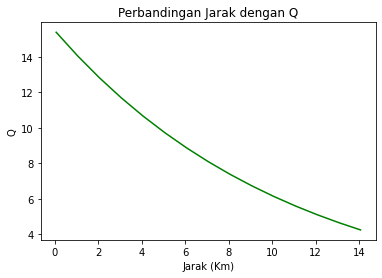

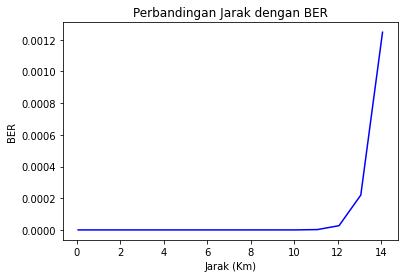

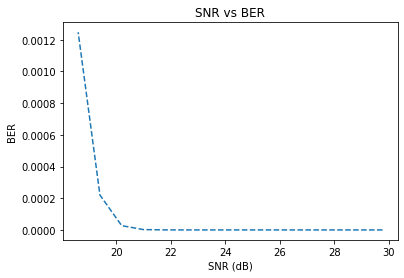

In [ ]:
#GRAFIK
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def grafik_4():
  plt.figure()
  plt.plot(SNR,BER,'--')
  plt.title('SNR vs BER')
  plt.xlabel('SNR (dB)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()
grafik_4()

Analisis : Dari analisis grafis di atas, dapat disimpulkan bahwa semakin banyak konektor, splitter dan penyambung fusi, dan pemilihan jenis serat akan mempengaruhi resistansi total dan akan mempengaruhi daya yang diterima. Dari daya yang diterima kita dapat melihat hasil SNR, semakin jauh jaraknya maka daya yang diterima semakin kecil, sehingga SNR semakin kecil dan kecil.